Richter Jordaan Pset3

Question 1)

Question 1.1)

In [37]:
@enum InfectionStatus S I R

In [38]:
x = S #has type InfectionStatus

S::InfectionStatus = 0

Question 1.2)

In [39]:
x=Int(x)

0

In [40]:
Int(I)

1

In [41]:
Int(R)

2

S has value 0, I has value 1, and R has value 2, similar to array indexing starting at 0

Question 1.3)

In [42]:
N=100
agents = [S for i in 1:N];

Question 1.4)

In [43]:
agents[rand(1:N)]=I

I::InfectionStatus = 1

Question 1.5)

In [44]:
function step!(agents::Vector{Agent},p_I)
    first_agent = rand(1:N)
    if agents[first_agent].status!=I
        return
    end
    second_agent=rand(1:N)
    while first_agent == second_agent
        second_agent=rand(1:N)
    end
    if agents[second_agent].status!=I && rand()<p_I
        agents[second_agent].status = I
        agents[first_agent].num_infected+=1
    end
end

step! (generic function with 1 method)

Question 1.6)

In [46]:
function sweep!(agents::Vector{Agent},p_I,p_R)
    for i in 1:length(agents)
        step!(agents,p_I)
    end
    #add recovery
    for i in 1:length(agents)
        if agents[i].status == I && rand()<p_R
            agents[i].status = R
        end
    end
end

sweep! (generic function with 1 method)

Question 1.7)

In [48]:
function num_infected_dis_simulation(N,p_I,p_R,T) #runs one simulation
    agents = [Agent() for i in 1:N]
    agents[1]=Agent(I,0)
    Is = zeros(T)
    for i in 1:T
        sweep!(agents,p_I,p_R)
        Is[i]=count([agents[i].status for i in 1:N].== I)
    end
    return Is,[agents[i].num_infected for i in 1:N]
end

num_infected_dis_simulation (generic function with 1 method)

Question 1.8)

In [49]:
N=100
T=1000
p_I=0.02
p_R = 0.0 #at this point in the pset we aren't considering recovery 
num_trials = 50
results =[]
infected_results = []

for i in 1:num_trials
    I_s,infected_counts = num_infected_dis_simulation(N,p_I,p_R,T)
    push!(results,I_s)
    push!(infected_results,infected_counts)
end

In [50]:
using Plots

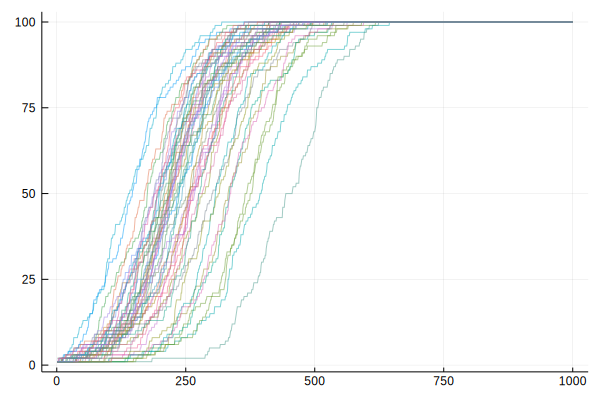

In [76]:
p = plot(results,leg=false,alpha=0.5)

Question 1.9)

In [52]:
import Pkg
Pkg.add("StatsBase")

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [53]:
using StatsBase
mean_traj = mean(results)

1000-element Array{Float64,1}:
   1.02
   1.02
   1.04
   1.06
   1.1
   1.1
   1.12
   1.12
   1.12
   1.18
   1.24
   1.28
   1.34
   ⋮
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0

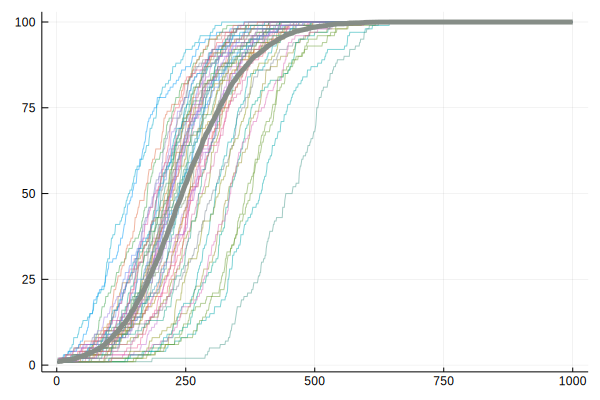

In [77]:
plot!(mean_traj,linewidth = 5)

Question 1.10)

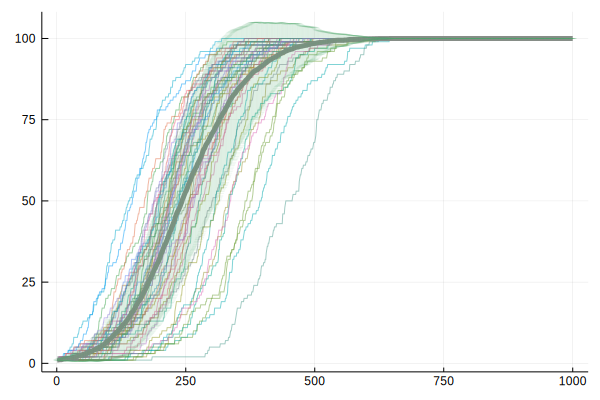

In [78]:
σ = []
for step in 1:T
    stepIs=zeros(num_trials)
    for trial in 1:num_trials
        stepIs[trial]=results[trial][step]
    end
    var = mean((stepIs.-mean_traj[step]).^2)
    std = sqrt(var)
    push!(σ,std)
end
#at each step, stepIs contains the I count of all trials at that step
plot!(mean_traj,yerr=σ,alpha=0.1)

Question 1.11)

The difference between the two is that the stochastic model possesses some degree of randomness, 
producing different results for the same parameter values. However from the graph it seems like
the deterministic model seems to be representing the "average", or expected value, of many trials
using a stochastic model.
    

Question 2

Question 2.1)

In [79]:
mutable struct Agent
    status::InfectionStatus
    num_infected::Int
end

Question 2.2)

In [80]:
Agent()=Agent(S,0)

Agent

Question 2.5)

In [81]:
function counts(data)
    d = Dict{Int, Int}()
    for val in data
        if haskey(d,val)
            d[val]+=1
        else
            d[val]=1
        end
    end
    return d
end

counts (generic function with 1 method)

In [82]:
function sorted_counts(data)
    d = Dict{Int, Int}()
    for val in data
        if haskey(d,val)
            d[val]+=1
        else
            d[val]=1
        end
    end
    ks = collect(keys(d))
    vs = collect(values(d))
    p = sortperm(ks)
    return ks[p],vs[p] #return sorted vectors of keys and values
end

sorted_counts (generic function with 1 method)

In [83]:
function probability_distribution(data)
    counts = sorted_counts(data)
    vals = counts[2]
    valsum = sum(vals)
    return counts[1],vals./valsum
end

probability_distribution (generic function with 1 method)

In [84]:
infected_list = []
for trial in 1:num_trials
    for agent in 1:N
        push!(infected_list,infected_results[trial][agent]) #infected_results contains results from a previous simulation
    end
end
dist = probability_distribution(infected_list)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0.5038, 0.2492, 0.122, 0.0608, 0.0344, 0.0156, 0.0078, 0.002, 0.0022, 0.0016, 0.0006])

Question 2.6)

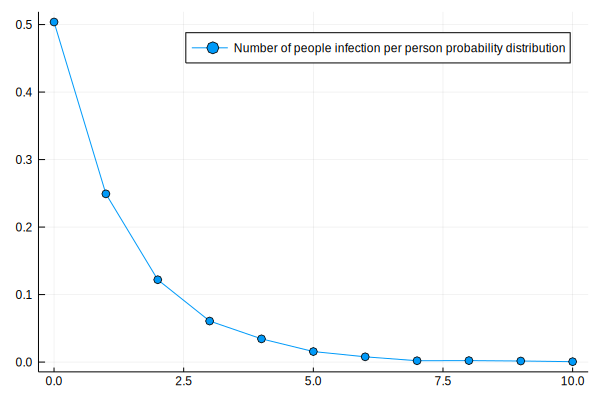

In [85]:
plot(dist,label="Number of people infection per person probability distribution",m=:o)

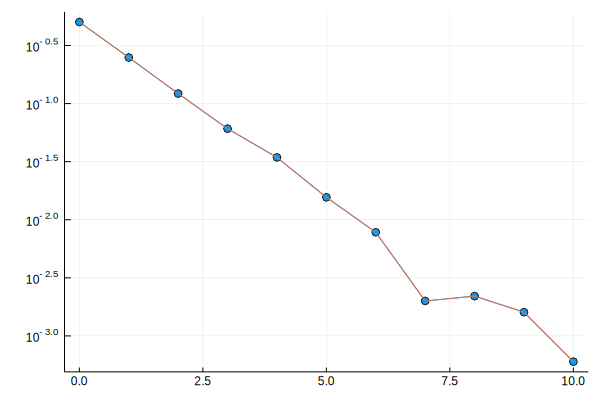

In [86]:
plot!(dist,yscale=:log10,leg=false)

It seems like an exponentially decreasing function, since the graph seems to be nearly linear with a log scale.

Question 3)

Question 3.1)

In [87]:
function simulation_with_recovery(N,p_I,p_R,T)
    agents = [Agent() for i in 1:N]
    agents[1]=Agent(I,0)
    Ss = zeros(T)
    Is = zeros(T)
    Rs = zeros(T)
    for i in 1:T
        sweep!(agents,p_I,p_R)
        Ss[i]=count([agents[i].status for i in 1:N].== S)
        Is[i]=count([agents[i].status for i in 1:N].== I)
        Rs[i]=count([agents[i].status for i in 1:N].== R)
    end
    return Ss,Is,Rs,probability_distribution([agents[i].num_infected for i in 1:N])
end

simulation_with_recovery (generic function with 1 method)

Question 3.2)

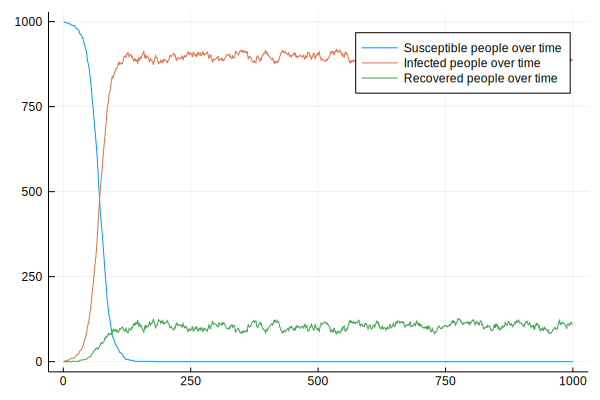

In [88]:
N = 1000
p_I = 0.1
p_R = 0.01
T = 1000

res = simulation_with_recovery(N,p_I,p_R,T)
plot(res[1],label="Susceptible people over time")
plot!(res[2],label = "Infected people over time")
plot!(res[3], label = "Recovered people over time")

Question 3.3)

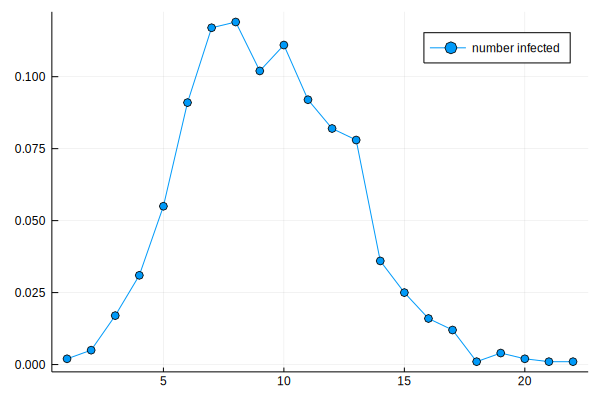

In [89]:
plot(res[4],label="number infected",m=:o)

This seems to resemble a normal distribution

Question 3.4)

In [93]:
num_trials = 50
I_count = []

for i in 1:num_trials
    res = simulation_with_recovery(N,p_I,p_R,T)
    push!(I_count,res[2])
end
mean_traj = mean(I_count);

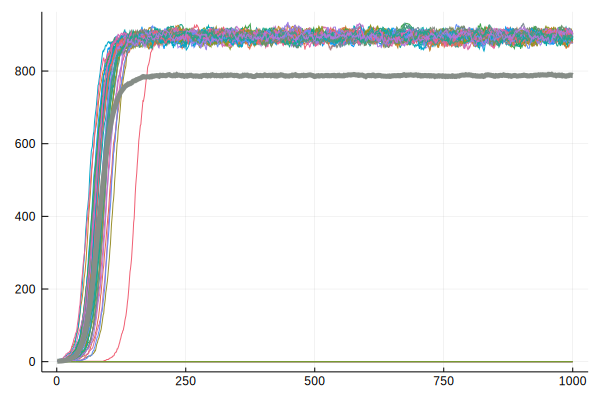

In [98]:
plot(I_count,leg=false)
plot!(mean_traj,linewidth=5)

3 ways to characterize the magnitude of the epidemic include:

1) the average number of people that each person infects

2) the maxmimum number of infected people at one time

3) average daily increase in infected people (max value of today's infected - yesterday's infected)

i will compute these using res, which was the result of the single simulation done in question 3.2

In [99]:
#avg number of people infected is sum of value*probability
avg_inf = 0
for i in 1:length(res[4][1])
    avg_inf += res[4][1][i]*res[4][2][i]
end
avg_inf

9.045

In [100]:
#max number of people infected
max_inf = maximum(res[2])

923.0

In [101]:
#avg daily increase
Is=res[2]
daily_change = zeros(length(Is))
for i in 2:length(daily_change)
    daily_change[i]=Is[i]-Is[i-1]
end
maximum(daily_change)

29.0